# **Data Wrangling Project 2024**
---

In fulfillment of the course *Data Wrangling XB_0014* at the *Vrije Universiteit Amsterdam*.<br>
This project was conducted by **Alvaro Pratama Maharto, Michael Evan Sutanto, Mahmoud Ashtar, and Miguel Sadorra.**

#### **TOPIC**: Marketing Strategy Effectivity
This research will be taking a look at the effects of different types of marketing campaigns and their effectivity in terms of clickthrough rate, customer engagement, and customer acquisition.
We will be having a look at the dataset with the following question in mind:
### **RESEARCH QUESTION**:
*How do different marketing strategies, particularly those used in bulk campaigns, impact the overall effectiveness of marketing initiatives, considering metrics such as clickthrough rates, customer engagement, and customer acquisition?*

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
campaigns_df = pd.read_csv("campaigns.csv")
messages_df = pd.read_csv("messages-demo.csv")

messages_df.head()

<ipython-input-107-14c5180f7d5b>:2: DtypeWarning: Columns (7,8,16,17,21,23,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv("messages-demo.csv")


,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_hard_bounced,hard_bounced_at,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31.0,transactional,1.515916e+18,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 11:27:43,t,2021-05-04 05:47:05,2021-05-04 05:47:05,t,2021-05-04 05:47:46,2021-05-04 05:47:46,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32.0,transactional,1.515916e+18,email,NaN,NaN,yandex.ru,desktop,2021-04-30,2021-04-30 08:00:35,t,2021-05-04 15:38:20,2021-05-04 15:38:20,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32.0,transactional,1.515916e+18,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:56:37,t,2021-05-04 15:16:32,2021-05-04 15:16:32,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32.0,transactional,1.515916e+18,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:53:59,t,2021-05-04 09:47:25,2021-05-04 09:47:25,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32.0,transactional,1.515916e+18,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 06:20:37,t,2021-05-04 18:56:16,2021-05-04 18:56:16,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [108]:
print(len(messages_df))
print(len(campaigns_df))

598225
1907


### Sampling
Since the data is about 10 million rows big, the group decided to use only a sample of 40% of the data to cut down on computing time.

In [109]:
# messages_df = messages_df[messages_df["message_type"] == "bulk"] # since bulk campaigns are over 93% of the campaigns we are only working with bulk messages and bulk campaings
# campaigns_df = campaigns_df[campaigns_df["campaign_type"] == "bulk"]

messages_sample = messages_df.sample(frac= 0.40, random_state= 42, replace= False)

In [110]:
messages_sample.head()
print(len(messages_sample))

239290


### Cleaning up the data
We will eliminate all of the unneccessary columns from the dataframes we created above and consolidate them into one `merged_df`

In [111]:
print("Messages Database:\n",list(messages_df.columns),"\n")
print("Campaigns Database:\n",list(campaigns_df.columns))

# our sample has many columns >>> some are disposable and some are missing the majority of the values => these will be dropped

messages_sample = messages_sample.drop(["id", "category", "platform", "stream", "hard_bounced_at", "soft_bounced_at",
                                         "is_soft_bounced", "is_hard_bounced",  "blocked_at", "updated_at", "is_complained",
                                         "complained_at", "opened_first_time_at", "clicked_last_time_at", "unsubscribed_at",
                                         "created_at", "message_type", "message_id", "date", "email_provider",
                                         "opened_last_time_at", "clicked_first_time_at"],
                                           axis= 1)

campaigns_df = campaigns_df.drop(["ab_test", "warmup_mode", "hour_limit", "is_test", "position", "campaign_type"], axis=1)



Messages Database:
 ['id', 'message_id', 'campaign_id', 'message_type', 'client_id', 'channel', 'category', 'platform', 'email_provider', 'stream', 'date', 'sent_at', 'is_opened', 'opened_first_time_at', 'opened_last_time_at', 'is_clicked', 'clicked_first_time_at', 'clicked_last_time_at', 'is_unsubscribed', 'unsubscribed_at', 'is_hard_bounced', 'hard_bounced_at', 'is_soft_bounced', 'soft_bounced_at', 'is_complained', 'complained_at', 'is_blocked', 'blocked_at', 'is_purchased', 'purchased_at', 'created_at', 'updated_at'] 

Campaigns Database:
 ['id', 'campaign_type', 'channel', 'topic', 'started_at', 'finished_at', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_test', 'position']


In [112]:
display(messages_sample[:10])

,campaign_id,client_id,channel,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at
80452,63.0,1.515916e+18,mobile_push,2021-04-30 07:22:57,t,f,f,f,f,NaN
576992,64.0,1.515916e+18,mobile_push,2021-04-30 08:29:54,f,f,t,f,f,NaN
294453,64.0,1.515916e+18,mobile_push,2021-04-30 08:17:57,f,f,f,f,f,NaN
497005,64.0,1.515916e+18,mobile_push,2021-04-30 08:28:10,f,f,f,f,f,NaN
76445,63.0,1.515916e+18,mobile_push,2021-04-30 07:22:46,t,f,f,f,f,NaN
293482,64.0,1.515916e+18,mobile_push,2021-04-30 08:17:57,f,f,f,f,f,NaN
277764,64.0,1.515916e+18,mobile_push,2021-04-30 07:44:27,f,f,f,f,f,NaN
547477,64.0,1.515916e+18,mobile_push,2021-04-30 07:38:40,f,f,f,f,f,NaN
365135,64.0,1.515916e+18,mobile_push,2021-04-30 08:43:26,f,f,f,f,f,NaN
468250,64.0,1.515916e+18,mobile_push,2021-04-30 07:38:34,f,f,f,f,f,NaN


In [113]:
display(campaigns_df[:10])

,id,channel,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,False,False,True,False,False,False
1,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,False,False,True,False,False,False
2,78,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080.0,146.0,False,False,True,False,False,False
3,79,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838.0,97.0,False,False,True,False,False,False
4,89,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503.0,109.0,False,True,True,False,False,False
5,110,mobile_push,sale out,2021-05-12 07:38:32.980268,2021-05-12 07:40:16,90816.0,146.0,False,False,True,False,False,False
6,111,mobile_push,sale out,2021-05-12 07:44:41.865082,2021-05-12 08:16:07,1045217.0,97.0,False,False,True,False,False,False
7,129,email,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,3.0,133.0,False,False,True,False,False,False
8,136,email,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,177363.0,133.0,False,False,True,False,False,False
9,138,mobile_push,sale out,2021-05-19 07:00:11.105536,2021-05-19 07:21:42,37889.0,146.0,False,False,True,False,False,False


In [114]:
merged_df = pd.merge(messages_sample, campaigns_df, left_on = "campaign_id", right_on= "id" ,how= "inner")
print(merged_df.isna().sum())

campaign_id                          0
client_id                            0
channel_x                            0
sent_at                              0
is_opened                            0
is_clicked                           0
is_unsubscribed                      0
is_blocked                           0
is_purchased                         0
purchased_at                    429507
id                                   0
channel_y                            0
topic                                0
started_at                      220026
finished_at                     220026
total_count                     220026
subject_length                   24524
subject_with_personalization     24524
subject_with_deadline            24524
subject_with_emoji               24524
subject_with_bonuses             24524
subject_with_discount            24524
subject_with_saleout             24524
dtype: int64


In [115]:
print(merged_df['topic'].value_counts())
# I WOULD SAY ['TOPIC'] is a pretty irrelevant column (TO_DROP())

bool_channel = (merged_df['channel_x'] == merged_df['channel_y'])
print(bool_channel.value_counts())
# channel_x and channel_y are identical


bool_id = (merged_df['campaign_id'] == merged_df['id'])
print(bool_id.value_counts())
# campaign_id and id are identical


sale out                      209571
order ready for pickup        191639
abandoned view                  7473
abandoned category              4689
abandoned cart                  3770
subscribed                      3643
recent purchase                 3410
order created                   1692
profile updated                 1233
added to wish list               846
order cancelled                  802
abandoned search                 693
order shipped                     95
order pickup still pending        41
Name: topic, dtype: int64
False    214832
True     214765
dtype: int64
True    429597
dtype: int64


### Converting string and bool values to binary
Since the database contains a lot of string values to represent True or False, we will convert these values to binary to have an easier time understanding the database and using it to analyze the data.

In [116]:
def convert_to_binary(value):
    value_lower = str(value).lower()
    if value_lower == 't':
        return 1
    elif value_lower == 'f':
        return 0
    else:
        return value

merged_df = merged_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
merged_df = merged_df.applymap(convert_to_binary)


In [117]:
pd.set_option('display.max_columns', None)
display(merged_df[:10])

,campaign_id,client_id,channel_x,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at,id,channel_y,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63.0,1.515916e+18,mobile_push,2021-04-30 07:22:57,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
1,63.0,1.515916e+18,mobile_push,2021-04-30 07:22:46,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
2,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:14,0,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
3,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:32,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
4,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:08,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
5,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:07,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
6,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:16,0,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
7,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:22,0,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
8,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:05,0,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0
9,63.0,1.515916e+18,mobile_push,2021-04-30 07:23:24,1,0,0,0,0,NaN,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,0.0,0.0,1.0,0.0,0.0,0.0


In [118]:
merged_df['channel_x'].value_counts()

mobile_push    399880
email           29714
web_push            3
Name: channel_x, dtype: int64

Need to check whether each type of `subject_type` affects `is_opened` and `is_purchased`

# Analyzing the Data
The group will now be analyzing the data in this section. We will be looking at important characteristics of the marketing campaign subjects and its effectiveness with regard to clickthrough rate which campaigns result in client purchase.

In [119]:
pd.pivot_table(merged_df,
                values='is_purchased',
                index=['subject_with_emoji', 'subject_with_personalization'],
                aggfunc='count')

,,is_purchased
subject_with_emoji,subject_with_personalization,
0.0,0.0,195502
1.0,0.0,209571


In [120]:
# can remove since every row has an emoji
emoji = merged_df.groupby("subject_with_emoji")['is_purchased'].value_counts()

# can remove since none have bonuses lol
bonuses = merged_df.groupby("subject_with_bonuses")['is_purchased'].value_counts()
display(bonuses)
display(emoji)

subject_with_bonuses  is_purchased
0.0                   0               405039
                      1                   34
Name: is_purchased, dtype: int64

subject_with_emoji  is_purchased
0.0                 0               195468
                    1                   34
1.0                 0               209571
Name: is_purchased, dtype: int64

### Marketing effect on Purchases
We will look at the effectiveness of advertising **<u>subject customization</u>** on sales.

In [121]:
personalization = merged_df.groupby('subject_with_personalization')['is_purchased'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_purchased'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_purchased'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_purchased'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_purchased', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [122]:
display(final_result)

personalization     deadline     discount     saleout    
                           0   1        0   1        0   1       0   1
is_purchased                                                          
0                     405039  34   405039  34   405039  34  405039  34
1                          0   0        0   0        0   0       0   0

After getting the correct dataframe with the effects of subject customization, we will then look at the improvement on sales per customization type (e.g. message personalization, messages with deadlines, message with discounts, message with saleouts).

In [123]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_purchased         0    1
                           
personalization 0  1.0  0.0
                1  1.0  0.0
deadline        0  1.0  0.0
                1  1.0  0.0
discount        0  1.0  0.0
                1  1.0  0.0
saleout         0  1.0  0.0
                1  1.0  0.0

<strong>Marketing results on Sales</strong>

<ipython-input-124-19995d352350>:3: RuntimeWarning: invalid value encountered in double_scalars
  percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100


,Difference,Percent Increase
Personalization,0.0,NaN
Deadline,0.0,NaN
Discount,0.0,NaN
Saleout,0.0,NaN


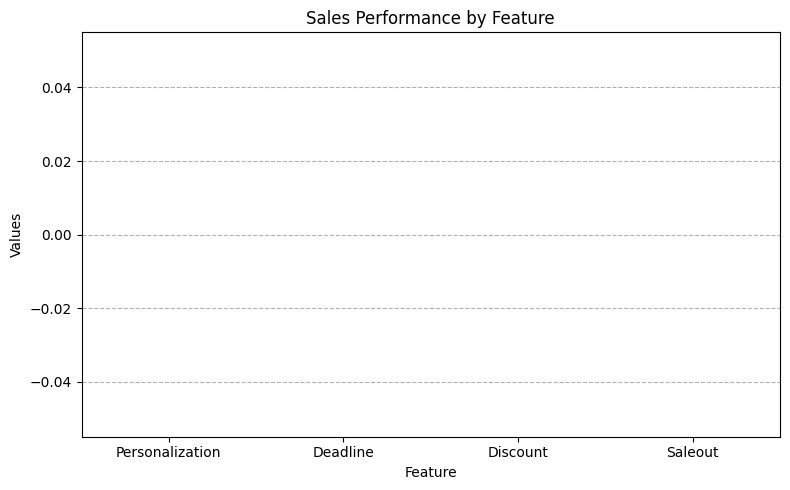

In [124]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])

display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Clickthrough Rate


In [125]:
personalization = merged_df.groupby('subject_with_personalization')['is_clicked'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_clicked'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_clicked'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_clicked'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_clicked', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [126]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_clicked           0    1
                           
personalization 0  1.0  0.0
                1  1.0  0.0
deadline        0  1.0  0.0
                1  1.0  0.0
discount        0  1.0  0.0
                1  1.0  0.0
saleout         0  1.0  0.0
                1  1.0  0.0

In [127]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

<ipython-input-127-fed60f4c6f70>:3: RuntimeWarning: invalid value encountered in double_scalars
  percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100


,Difference,Percent Increase
Personalization,0.0,NaN
Deadline,0.0,NaN
Discount,0.0,NaN
Saleout,0.0,NaN


### Marketing Performance on Customer Engagement

In [128]:
personalization = merged_df.groupby('subject_with_personalization')['is_unsubscribed'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_unsubscribed'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_unsubscribed'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_unsubscribed'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_unsubscribed', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [129]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_unsubscribed      0    1
                           
personalization 0  1.0  0.0
                1  1.0  0.0
deadline        0  1.0  0.0
                1  1.0  0.0
discount        0  1.0  0.0
                1  1.0  0.0
saleout         0  1.0  0.0
                1  1.0  0.0

,Difference,Percent Increase
Personalization,0.0,0.0
Deadline,0.0,0.0
Discount,0.0,0.0
Saleout,0.0,0.0


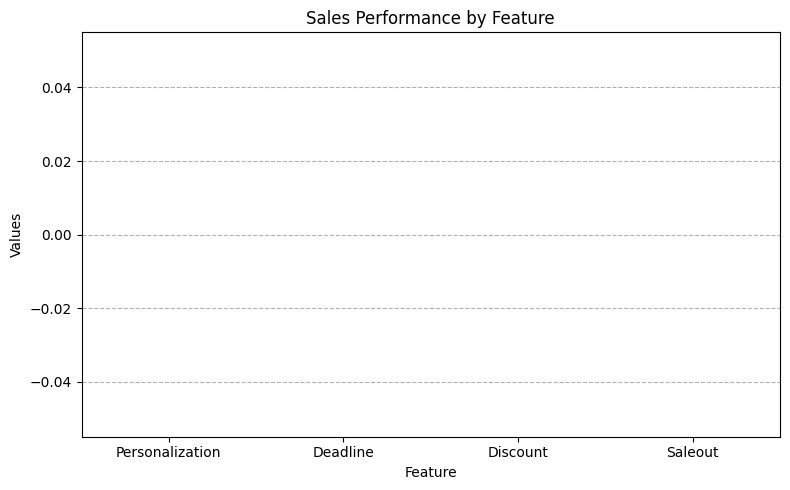

In [130]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[0][(feature, 1)] - diff_df[0][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[0][(feature, 0)]) * 100
    return diff_1, percentage_inc

personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff],
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]},
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance based on Channel Type


In [131]:
channel_type = merged_df.groupby('channel_x')
channel_purchases = channel_type['is_purchased'].value_counts()
channel_clicks = channel_type['is_clicked'].value_counts()

result = pd.concat([channel_purchases, channel_clicks], axis=1, keys=['purchased', 'clicked'])
display(result)

purchased  clicked
channel_x                        
email       0      29624    28105
            1         90     1609
mobile_push 0     399880   399880
web_push    0          3        3

### The Impact of Subject Length on Email Open Rates

is_opened  subject_length  percentage
0                    74.0   39.444116
1                    76.0   47.058824
2                    88.0   30.850048
3                    97.0   11.979528
4                    99.0   66.666667
5                   101.0   20.000000
6                   106.0   62.500000
7                   127.0   49.450549
8                   134.0   34.468775
9                   139.0   11.979528
10                  146.0   29.429476


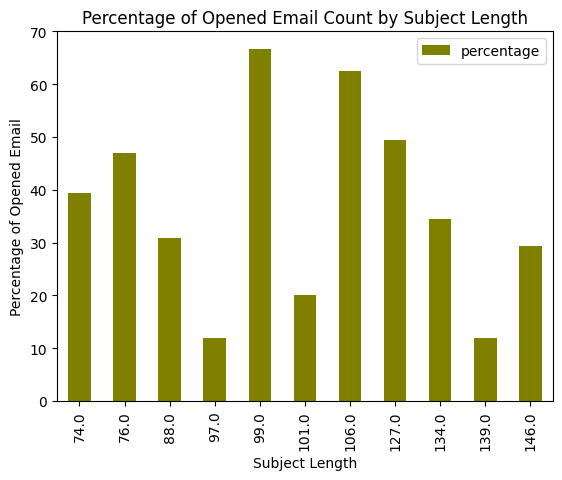

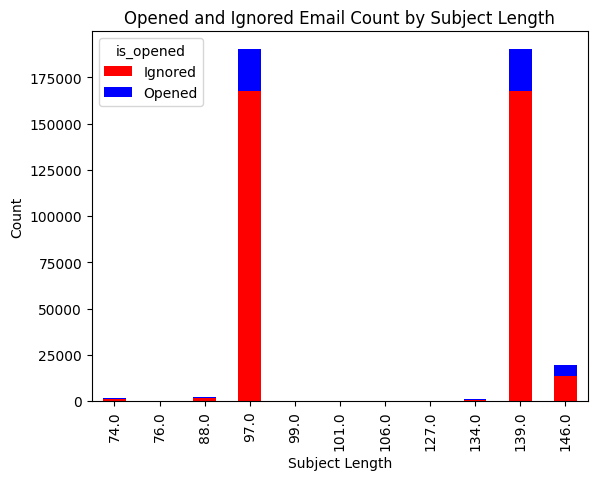

In [132]:
grouped_data = merged_df.groupby(['subject_length', 'is_opened']).size().reset_index(name='count')
opened_data = grouped_data[grouped_data['is_opened'] == 1]
ignored_data = grouped_data[grouped_data['is_opened'] == 0]

pivot_data = grouped_data.pivot(index='subject_length', columns='is_opened', values='count')
pivot_data['percentage'] = (pivot_data[1] / (pivot_data[1] + pivot_data[0])) * 100
pivot_data.reset_index(inplace=True)
print(pivot_data[['subject_length', 'percentage']])

pivot_data.plot(kind='bar', x='subject_length', y='percentage', color='olive')
plt.xlabel('Subject Length')
plt.ylabel('Percentage of Opened Email')
plt.title('Percentage of Opened Email Count by Subject Length')
plt.show()

stacked_bar = grouped_data.pivot(index='subject_length', columns='is_opened', values='count')
stacked_bar.plot(kind='bar', stacked='True', color=['red', 'blue'])
plt.xlabel('Subject Length')
plt.ylabel('Count')
plt.title('Opened and Ignored Email Count by Subject Length')
plt.legend(title='is_opened', labels=['Ignored', 'Opened'])
plt.show()

### Checking if holidays correspond to client purchases

In [133]:
holidays_df = pd.read_csv('holidays.csv')
first_purchase_df = pd.read_csv('client_first_purchase_date.csv')

from datetime import datetime
import pytz

Creating a dataframe looking at the marketing generated sales that occured during holidays:

In [134]:
temp_df = pd.DataFrame({'date_p': merged_df['purchased_at']}).reset_index()
temp_df = temp_df.dropna(subset=['date_p'])
for i in temp_df.index:
    temp_df.loc[i, 'date_p'] = pd.to_datetime(temp_df['date_p'][i]).strftime('%Y-%m-%d')

result_df = pd.merge(holidays_df, temp_df, left_on='date', right_on='date_p', how='inner')
holiday_messages_df = result_df[['holiday', 'date_p']].value_counts().reset_index(name='count')

display(holiday_messages_df)

,holiday,date_p,count
0,Spring and Labor Day,2021-05-01,7
1,Victory day,2021-05-09,1


Creating a dataframe looking at the store sales that occured during holidays:

In [135]:
result_df = pd.merge(holidays_df, first_purchase_df, left_on='date', right_on='first_purchase_date', how='inner')
holiday_store_sales_df = result_df[['holiday', 'date']].value_counts().reset_index(name='count')
display(holiday_store_sales_df)

,holiday,date,count
0,Unity Day,2022-11-04,6416
1,Independence Day,2023-06-12,4908
2,Spring and Labor Day,2023-05-01,3831
3,Victory day,2023-05-09,3286
4,Back to School,2023-09-01,3209
5,Black Friday,2023-11-24,3004
6,International Women's Day,2022-03-08,2851
7,Fool's day,2022-04-01,2643
8,Unity Day,2023-11-04,2512
9,Cyber Monday Sale,2022-01-31,2508


Computing percentage of sales generated during holidays, with respect to the total amount of sales produced by the store.

In [136]:
fraction_messages = (holiday_store_sales_df['count'].sum() / len(first_purchase_df)) * 100
fraction_first = (holiday_messages_df['count'].sum() / merged_df['is_purchased'].sum()) * 100

print("PERCENT INCREASE IN SALES:\n")
print("Percentage of first time customer purchases that occured during a holiday:")
print(round(fraction_first,2),"%")
print("\nPercentage of marketing generated purchases that occured during a holiday:")
print(round(fraction_messages,2),"%")

PERCENT INCREASE IN SALES:

Percentage of first time customer purchases that occured during a holiday:
8.89 %

Percentage of marketing generated purchases that occured during a holiday:
3.68 %


In [137]:
print(campaigns_df["topic"].unique())
print(merged_df["topic"].unique())

clicked_per_topic = merged_df.groupby("topic")["is_clicked"].value_counts()
opened_per_topic = merged_df.groupby("topic")["is_opened"].value_counts()
purchased_per_topic = merged_df.groupby("topic")["is_purchased"].value_counts()
display(clicked_per_topic)
display(opened_per_topic)
display(purchased_per_topic)



['sale out' nan 'event' 'offer after purchase' 'happy birthday'
 'leave review' 'welcome campaign' 'abandoned cart' 'abandoned category'
 'abandoned view' 'added to wish list' 'abandoned search' 'subscribed'
 'removed from wish list' 'double opt in' 'user added to segment'
 'recent purchase' 'price drop' 'back in stock' 'order shipped'
 'order reminder' 'welcome letter' 'order ready for pickup'
 'order created' 'bonuses expired' 'order cancelled'
 'order pickup still pending' 'profile updated' 'wish list status']
['sale out' 'order ready for pickup' 'abandoned view' 'order created'
 'abandoned cart' 'abandoned category' 'recent purchase' 'subscribed'
 'order cancelled' 'added to wish list' 'profile updated'
 'abandoned search' 'order shipped' 'order pickup still pending']


topic                       is_clicked
abandoned cart              0               3672
                            1                 98
abandoned category          0               4559
                            1                130
abandoned search            0                681
                            1                 12
abandoned view              0               7149
                            1                324
added to wish list          0                803
                            1                 43
order cancelled             0                769
                            1                 33
order created               0               1547
                            1                145
order pickup still pending  0                 38
                            1                  3
order ready for pickup      0             191537
                            1                102
order shipped               0                 87
                            1 

topic                       is_opened
abandoned cart              0              3301
                            1               469
abandoned category          0              4068
                            1               621
abandoned search            0               623
                            1                70
abandoned view              0              6261
                            1              1212
added to wish list          0               701
                            1               145
order cancelled             0               570
                            1               232
order created               0              1025
                            1               667
order pickup still pending  0                24
                            1                17
order ready for pickup      0            168401
                            1             23238
order shipped               0                49
                            1                46
pr

topic                       is_purchased
abandoned cart              0                 3760
                            1                   10
abandoned category          0                 4676
                            1                   13
abandoned search            0                  693
abandoned view              0                 7446
                            1                   27
added to wish list          0                  842
                            1                    4
order cancelled             0                  796
                            1                    6
order created               0                 1676
                            1                   16
order pickup still pending  0                   41
order ready for pickup      0               191628
                            1                   11
order shipped               0                   95
profile updated             0                 1232
                            1            

In [138]:

# for i in clicked_per_topic.index:
#     print(clicked_per_topic[i[0]])
# clicked_percentage = clicked_per_topic["event"][1] / (clicked_per_topic["event"][1] + clicked_per_topic["event"][0]) * 100
# print(clicked_percentage)

print(type(clicked_per_topic))

<class 'pandas.core.series.Series'>


In [139]:

def calc_perecentage(rest, part):
    return (part / (rest + part)) * 100

def calc_percentages(col_name):
    topics_clicks = topcis_engagement.groupby("topic")[col_name].value_counts()
    # calculating clicks percentages of our chosen topics
    percentages = []
    for i in range(0, len(topics_clicks), 2):
        if i == len(topics_clicks) - 1:  # least one has 0 clicks so clicks percentage is 0%
            percentages.append(0)
            break
        percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))

    return percentages

# Choosing 5 topics with most engagement and 5 topics with least engagement
topics = merged_df["topic"].value_counts()
topics = pd.concat([topics[:5], topics[-5:]])

# filter only the topics in our engagement list
topcis_engagement = merged_df.loc[merged_df["topic"].isin(topics.index)][["topic", "is_clicked", "is_opened", "is_purchased"]]

topics_clicks = topcis_engagement.groupby("topic")["is_clicked"].value_counts()

# calculating clicks percentages of our chosen topics
clicks_percentages = calc_percentages("is_clicked")
opened_percentages = calc_percentages("is_opened")
purchased_percentages = calc_percentages("is_purchased")


print("topics with most engagement:")
for i in topics.index[:5]:
    print(i, end= ", ")
print("\n\ntopics with least engagement:")
for i in topics.index[-5:]:
    print(i, end=", ")

print("\n\n", topics)


topics with most engagement:
sale out, order ready for pickup, abandoned view, abandoned category, abandoned cart, 

topics with least engagement:
added to wish list, order cancelled, abandoned search, order shipped, order pickup still pending, 

 sale out                      209571
order ready for pickup        191639
abandoned view                  7473
abandoned category              4689
abandoned cart                  3770
added to wish list               846
order cancelled                  802
abandoned search                 693
order shipped                     95
order pickup still pending        41
Name: topic, dtype: int64


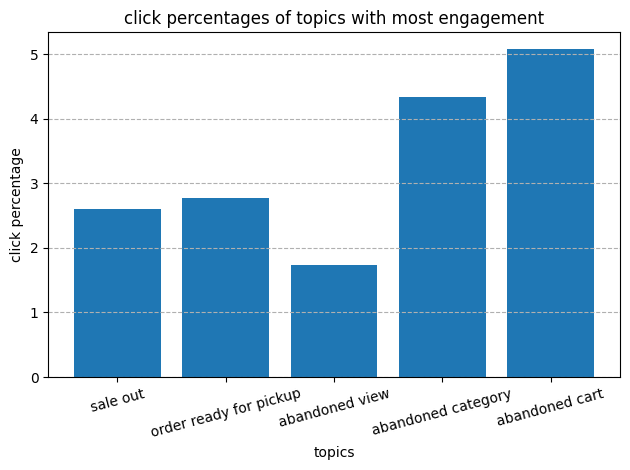

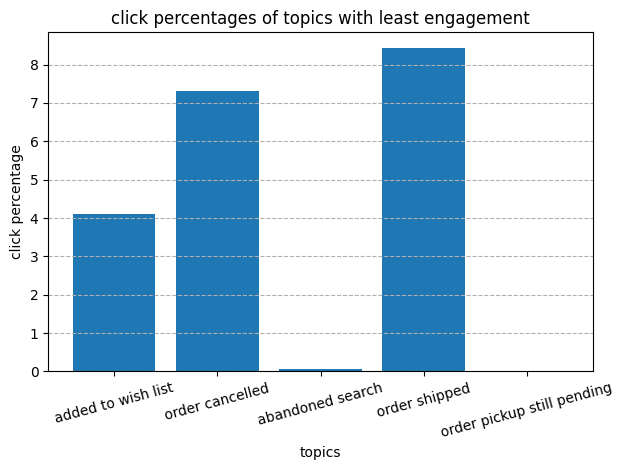

In [140]:
plt.bar(topics.index[:5].to_list(), clicks_percentages[:5])
plt.title("click percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), clicks_percentages[-5:])
plt.title("click percentages of topics with least engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()




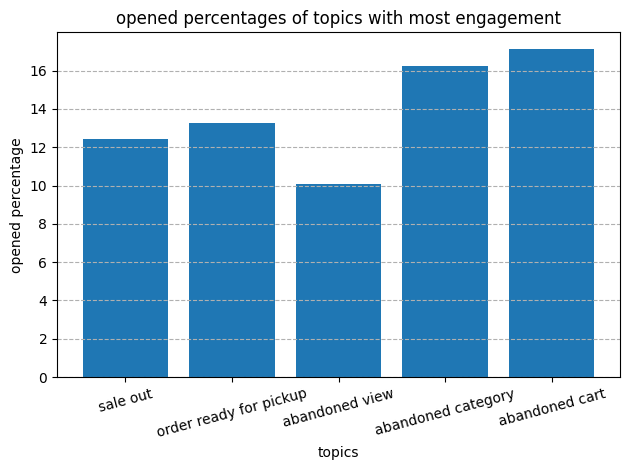

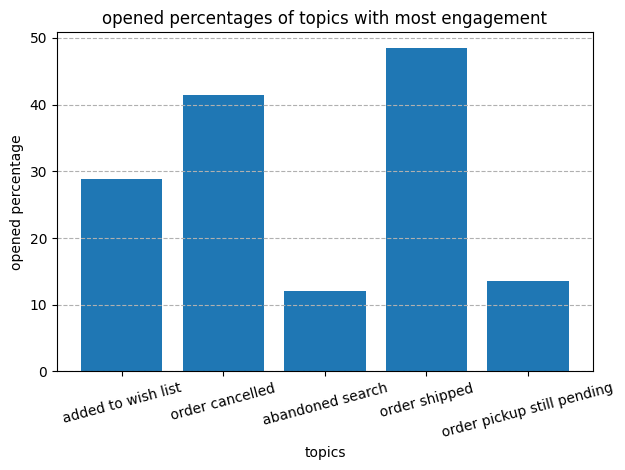

In [141]:
plt.bar(topics.index[:5].to_list(), opened_percentages[:5])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), opened_percentages[-5:])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

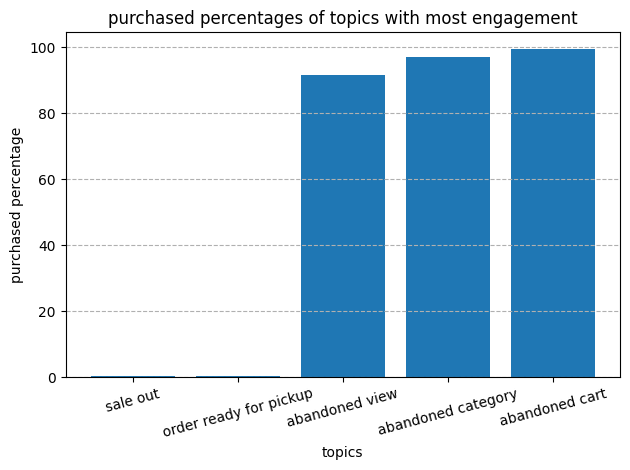

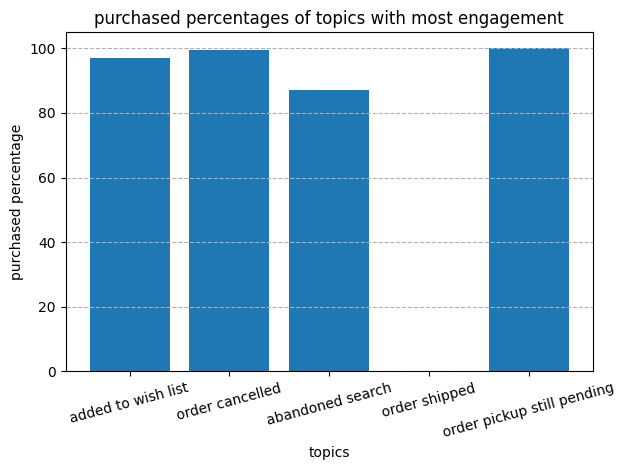

In [142]:
plt.bar(topics.index[:5].to_list(), purchased_percentages[:5])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), purchased_percentages[-5:])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**NOTE** what can we read from the plots?? I don't understand how there is a campaign with the topic order shipped!! this one is weird. maybe we should manually select the topics we want to review.
chech the effect of holidays on sales!!
heatmap to discover important features correlated with purchases, clicks, or opens.